Describing the static datasets

In [39]:
import pandas as pd
cuts = pd.read_csv('Total_cuts.csv') # File imported from SQL database query, on 24/03/23
cuts.keys()
cuts['elapsedtime']

0         0d 8:30
1         0d 8:30
2         0d 8:30
3         0d 8:30
4          0d 0:2
          ...    
8280    47d 14:54
8281    47d 14:54
8282    47d 14:54
8283    47d 14:54
8284    47d 14:54
Name: elapsedtime, Length: 8285, dtype: object

Converting elapsed time to a datetime format.

In [40]:
day=[]
for time in cuts['elapsedtime']:
    if 'd' in time[:2]:
        days = time[0:2].replace('d', '')
        day.append(int(days))
    else:
        day.append(int(time[0:2]))
cuts["days"] = pd.to_timedelta(day, unit='d')
hours = [i[3:len(i)].strip() for i in cuts['elapsedtime']]
df = pd.DataFrame(hours)
df['hours'] = hours
df['hours'] = pd.to_timedelta(df['hours']+':00')
cuts["total_duration_final"] = df['hours']+cuts['days']

In [41]:
cuts["total_duration_final"].describe()

count                          8285
mean      3 days 04:33:19.299939649
std      11 days 12:54:48.835797795
min                 0 days 00:00:00
25%                 0 days 01:22:00
50%                 0 days 03:30:00
75%                 0 days 08:20:00
max                48 days 12:53:00
Name: total_duration_final, dtype: object

In [42]:
cuts.keys()

Index(['reference', 'incidentid', 'totalconfirmedpowercut', 'powercutcategory',
       'elapsedtime', 'Days', 'Hours', 'Total Time',
       'estimatedtimetillresolution', 'loggedtime', 'natureofoutage',
       'totalpredictedpowercut', 'priority', 'type', 'customerstagesequence',
       'incidentstatus', 'insertdate', 'updatedate', 'reason',
       'customerstagesequencemessage', 'postcode', 'area', 'lat', 'lng',
       'isaffected', 'id', 'label', 'incidentsconfigid',
       'custometrmessageflag', 'custometrmessage', 'custometrmessageparea',
       'configstatus', 'iscustomincident', 'managecustomincidentsid', 'date',
       'days', 'total_duration_final'],
      dtype='object')

Plotting the frequency of power cuts with the total duration.

<Axes: title={'center': 'Power Cuts in the North East'}, ylabel='Frequency'>

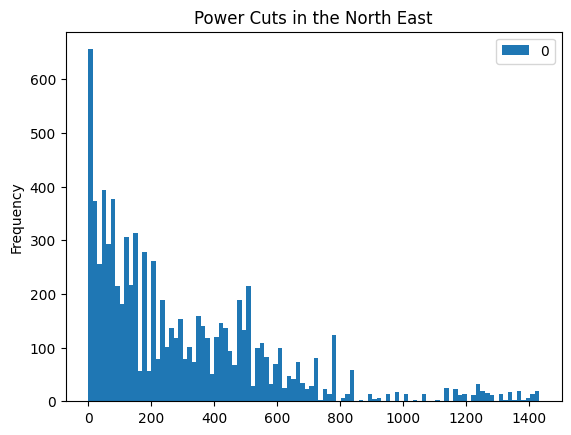

In [43]:
cuts.head(2)
seconds  = pd.DataFrame(i.seconds for i in cuts['total_duration_final'])
seconds
hours = seconds/60
hours.plot(kind='hist', bins=100, title='Power Cuts in the North East', xlabel='Hours', ylabel='Frequency')

Plotting the total number of hours with the reason of the power cuts. 

powercutcategory
1                              26286.0
11                             47396.0
12                             23072.0
8                              89960.0
Damaged service U/G             6699.0
HV Restoration                 63790.0
LV Restoration                  2990.0
Safety Interruption            16270.0
U/G HV Mains Repair             6179.0
U/G LV CONSAC Repair            7816.0
U/G LV Mains Repair (Other)    62046.0
U/G Service repair             14751.0
Unknown P2                     13622.0
Name: hours, dtype: float64


<Axes: title={'center': 'Power Cuts in the North East'}, xlabel='Power Cut Category', ylabel='Hours'>

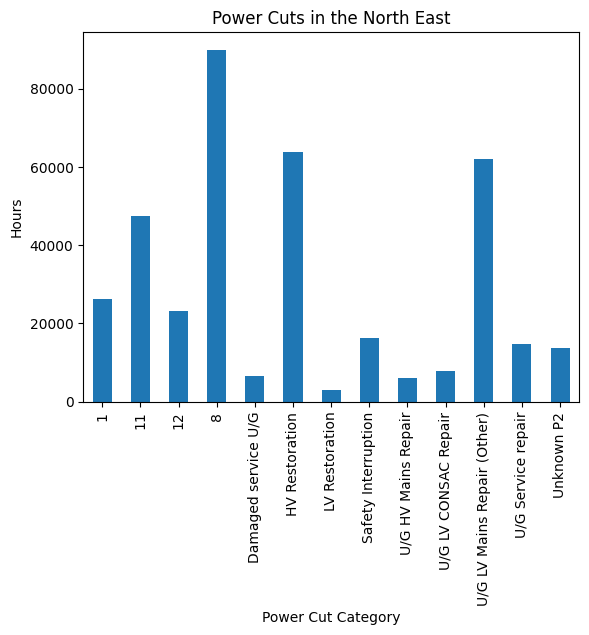

In [44]:
cuts["hours"] = hours
cuts.head(2)

cuts_grouped = cuts[cuts["area"] == "North East"].groupby('powercutcategory')['hours'].sum()
# Print the result
print(cuts_grouped)
cuts_grouped.plot(kind='bar', title='Power Cuts in the North East', xlabel='Power Cut Category', ylabel='Hours')
# select count(cuts['hours']) from cuts where cuts['area'] = 'North East' group by cuts['powercutcategory']

In [9]:
cuts.keys()

Index(['reference', 'incidentid', 'totalconfirmedpowercut', 'powercutcategory',
       'elapsedtime', 'Days', 'Hours', 'Total Time',
       'estimatedtimetillresolution', 'loggedtime', 'natureofoutage',
       'totalpredictedpowercut', 'priority', 'type', 'customerstagesequence',
       'incidentstatus', 'insertdate', 'updatedate', 'reason',
       'customerstagesequencemessage', 'postcode', 'area', 'lat', 'lng',
       'isaffected', 'id', 'label', 'incidentsconfigid',
       'custometrmessageflag', 'custometrmessage', 'custometrmessageparea',
       'configstatus', 'iscustomincident', 'managecustomincidentsid', 'date',
       'days', 'total_duration_final', 'hours'],
      dtype='object')

Analysing the type of cuts by unique incident. 

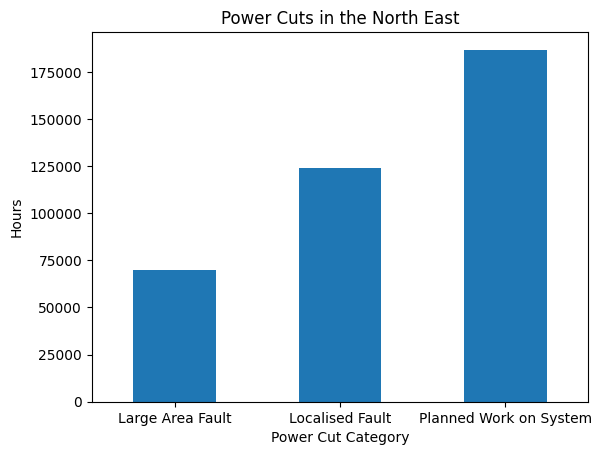

In [45]:
cuts[cuts["area"] == 'North East'].groupby('natureofoutage')['hours'].sum().plot(kind='bar', title='Power Cuts in the North East', xlabel='Power Cut Category', ylabel='Hours', rot = 0)
list = ["Nature of Outage", "Power Cut Category","priority"]

In [47]:
cuts_unique = cuts.drop_duplicates(subset='reference')
cuts_unique.reset_index(drop=True, inplace=True)
cuts_unique.head(2)

,reference,incidentid,totalconfirmedpowercut,powercutcategory,elapsedtime,Days,Hours,Total Time,estimatedtimetillresolution,loggedtime,natureofoutage,totalpredictedpowercut,priority,type,customerstagesequence,incidentstatus,insertdate,updatedate,reason,customerstagesequencemessage,postcode,area,lat,lng,isaffected,id,label,incidentsconfigid,custometrmessageflag,custometrmessage,custometrmessageparea,configstatus,iscustomincident,managecustomincidentsid,date,days,total_duration_final,hours
0,PPC049583,NaN,4,11,0d 8:30,0,08:30,0:08:30:00,2023-03-19T16:00:00Z,2023-03-19T08:00:00Z,Planned Work on System,0,8,HV_N,0,6,2023-03-19T16:30:13Z,2023-03-19T16:30:13Z,We need to temporarily turn the power off to c...,The scheduled work has now been completed,NE36 0AE,North East,54.9482,-1.42305,0,1676194,NaN,0,False,NaN,NaN,False,False,0,20230319,0 days,0 days 08:30:00,510.0
1,INCD-382381-A,A0005d5adINCD,0,Unknown P2,0d 0:2,0,00:02,0:00:02:00,2023-03-19T19:12:00Z,2023-03-19T16:12:00Z,Localised Fault,41,4,LV,1,6,2023-03-19T16:15:35Z,2023-03-19T16:20:18Z,The power cut affecting your property has been...,We are currently allocating the job of restori...,BD18 1DG,Yorkshire,53.8367,-1.76110,0,1676190,NaN,0,False,NaN,NaN,False,False,0,20230319,0 days,0 days 00:02:00,2.0


In [48]:
pd.set_option('display.max_columns', None)
cuts.head(3)

,reference,incidentid,totalconfirmedpowercut,powercutcategory,elapsedtime,Days,Hours,Total Time,estimatedtimetillresolution,loggedtime,natureofoutage,totalpredictedpowercut,priority,type,customerstagesequence,incidentstatus,insertdate,updatedate,reason,customerstagesequencemessage,postcode,area,lat,lng,isaffected,id,label,incidentsconfigid,custometrmessageflag,custometrmessage,custometrmessageparea,configstatus,iscustomincident,managecustomincidentsid,date,days,total_duration_final,hours
0,PPC049583,NaN,4,11,0d 8:30,0,08:30,0:08:30:00,2023-03-19T16:00:00Z,2023-03-19T08:00:00Z,Planned Work on System,0,8,HV_N,0,6,2023-03-19T16:30:13Z,2023-03-19T16:30:13Z,We need to temporarily turn the power off to c...,The scheduled work has now been completed,NE36 0AE,North East,54.9482,-1.42305,0,1676194,NaN,0,False,NaN,NaN,False,False,0,20230319,0 days,0 days 08:30:00,510.0
1,PPC049583,NaN,4,11,0d 8:30,0,08:30,0:08:30:00,2023-03-19T16:00:00Z,2023-03-19T08:00:00Z,Planned Work on System,0,8,HV_N,0,6,2023-03-19T16:30:13Z,2023-03-19T16:30:13Z,We need to temporarily turn the power off to c...,The scheduled work has now been completed,NE36 0AH,North East,54.9480,-1.42151,0,1676194,NaN,0,False,NaN,NaN,False,False,0,20230319,0 days,0 days 08:30:00,510.0
2,PPC049583,NaN,4,11,0d 8:30,0,08:30,0:08:30:00,2023-03-19T16:00:00Z,2023-03-19T08:00:00Z,Planned Work on System,0,8,HV_N,0,6,2023-03-19T16:30:13Z,2023-03-19T16:30:13Z,We need to temporarily turn the power off to c...,The scheduled work has now been completed,NE36 0AD,North East,54.9485,-1.42277,0,1676194,NaN,0,False,NaN,NaN,False,False,0,20230319,0 days,0 days 08:30:00,510.0


In [49]:
cuts["insertdate"] = [pd.to_datetime(i) for i in cuts["insertdate"]] 
# - pd.to_datetime(cuts["updatedate"]
cuts["updatedate"] = [pd.to_datetime(i) for i in cuts["updatedate"]]


Plotting the unique incident IDs

In [50]:
cuts_unique = cuts.drop_duplicates(subset='reference')
type(cuts_unique["updatedate"][0])
type(cuts_unique["insertdate"][0])

f= cuts_unique["insertdate"][0] - cuts_unique["updatedate"][0]
# date_diff = cuts_unique["updatedate"] - cuts_unique["insertdate"]
a = []
i = 0
time_diff = []
wrong_index = []
# loop through each row in the DataFrame
for i in range(len(cuts_unique)):
    try:
        # calculate the time difference between "insertdate" and "updatedate"
        r =  cuts_unique.loc[i, "updatedate"] - cuts_unique.loc[i, "insertdate"] 
        f = r.total_seconds()/(3600*24)
        # append the time difference to the list
        time_diff.append(f)
    except:
        # if there's an error, print the index of the row and continue to the next row
        # print(f"Error at index {i}")
        time_diff.append(None)
        wrong_index.append(i)
        continue


In [51]:
cuts_unique["insertdate"].tail(14)

3491   2023-03-20 14:16:18+00:00
4127   2023-03-19 09:35:48+00:00
4269   2023-03-19 21:05:29+00:00
4351   2023-03-19 20:15:33+00:00
4356   2023-03-19 20:09:04+00:00
4361   2023-03-19 19:30:36+00:00
4362   2023-03-19 19:12:19+00:00
4364   2023-03-19 18:17:15+00:00
4369   2023-03-19 17:33:58+00:00
5064   2023-03-20 18:35:36+00:00
6129   2023-03-19 22:55:54+00:00
6133   2023-03-19 22:55:52+00:00
6737   2023-03-19 23:26:27+00:00
7323   2023-03-20 22:41:15+00:00
Name: insertdate, dtype: datetime64[ns, UTC]

Plotting time lag between day of update and addition of Incident

<Axes: title={'center': 'Power Cuts in the North East'}, ylabel='Frequency'>

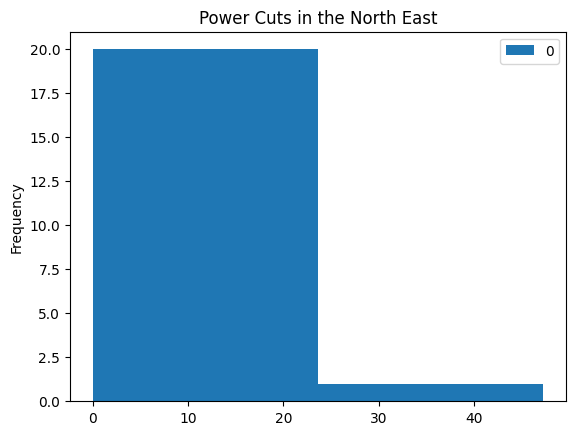

In [52]:
pd.DataFrame(time_diff).plot(kind='hist', bins=2, title='Power Cuts in the North East', xlabel='Hours', ylabel='Frequency')

All Power Cuts plotted with different variables (Duration plot)

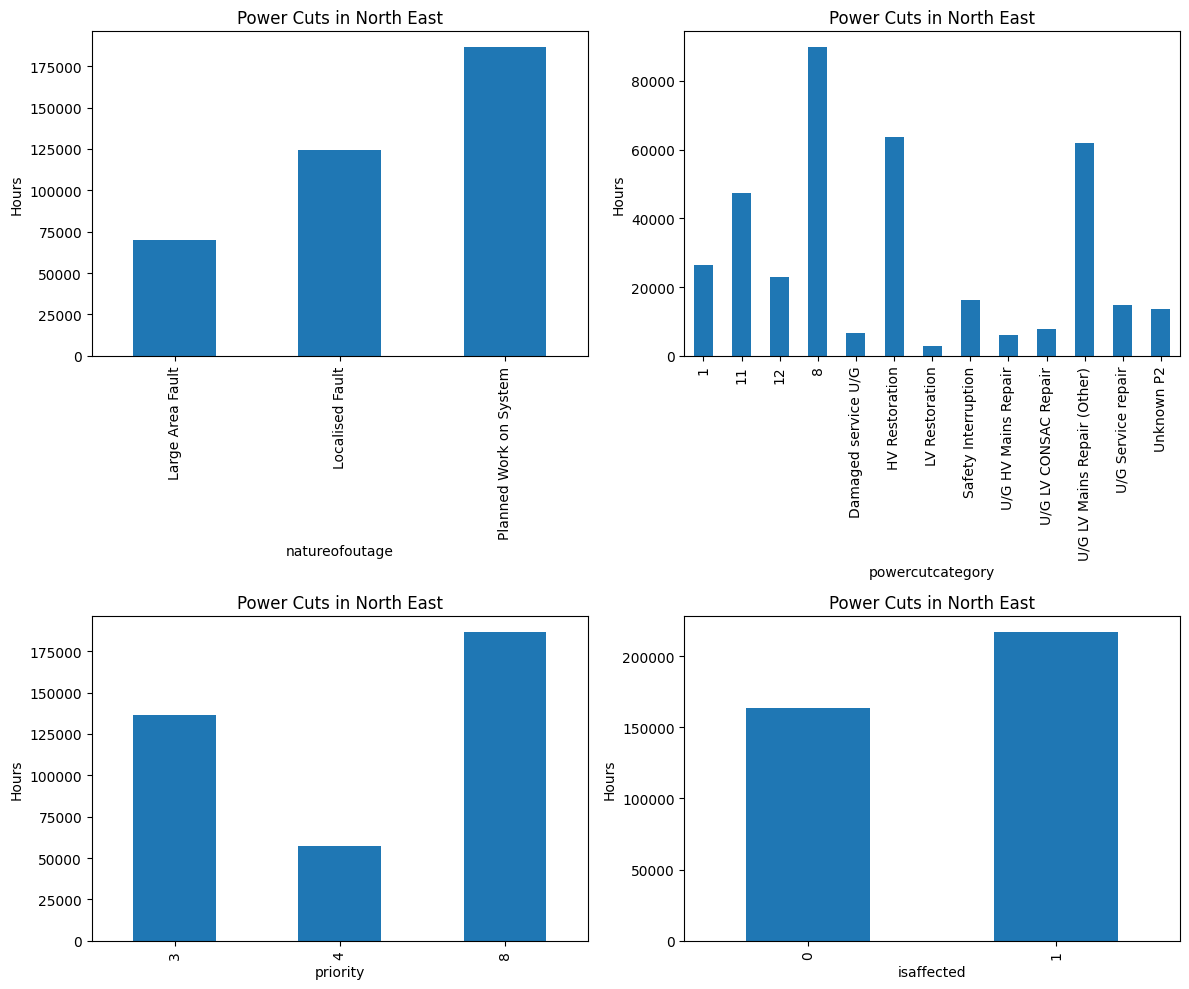

In [53]:
import matplotlib.pyplot as plt

variables = ["natureofoutage", "powercutcategory", "priority", "isaffected"]

area = "North East"

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axs.view()

for i, var in enumerate(variables):
    row = i // 2
    col = i % 2
    cuts[cuts["area"] == area].groupby(var)["hours"].sum().plot(
        kind="bar", title=f"Power Cuts in {area}", xlabel=var, ylabel="Hours", ax=axs[row][col]
    )

plt.tight_layout()
plt.show()

Total power cuts with Unique Incident IDs in the North East (Duration plot)

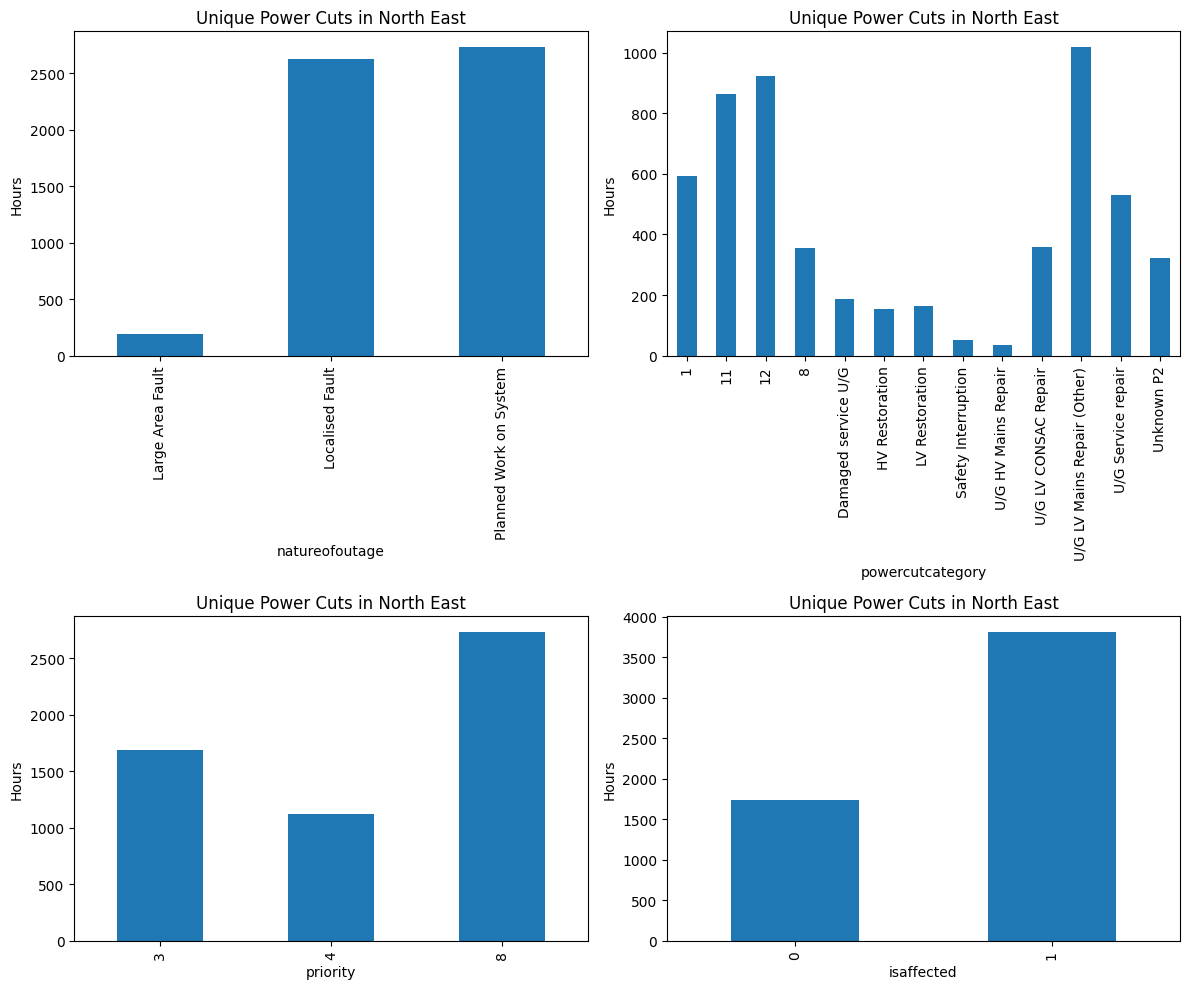

In [54]:
import matplotlib.pyplot as plt

variables = ["natureofoutage", "powercutcategory", "priority", "isaffected"]

area = "North East"

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axs.view()

for i, var in enumerate(variables):
    row = i // 2
    col = i % 2
    cuts_unique[cuts_unique["area"] == area].groupby(var)["hours"].sum().plot(
        kind="bar", title=f"Unique Power Cuts in {area}", xlabel=var, ylabel="Hours", ax=axs[row][col]
    )

plt.tight_layout()
plt.show()

Total power cuts in the North East (frequency plot)

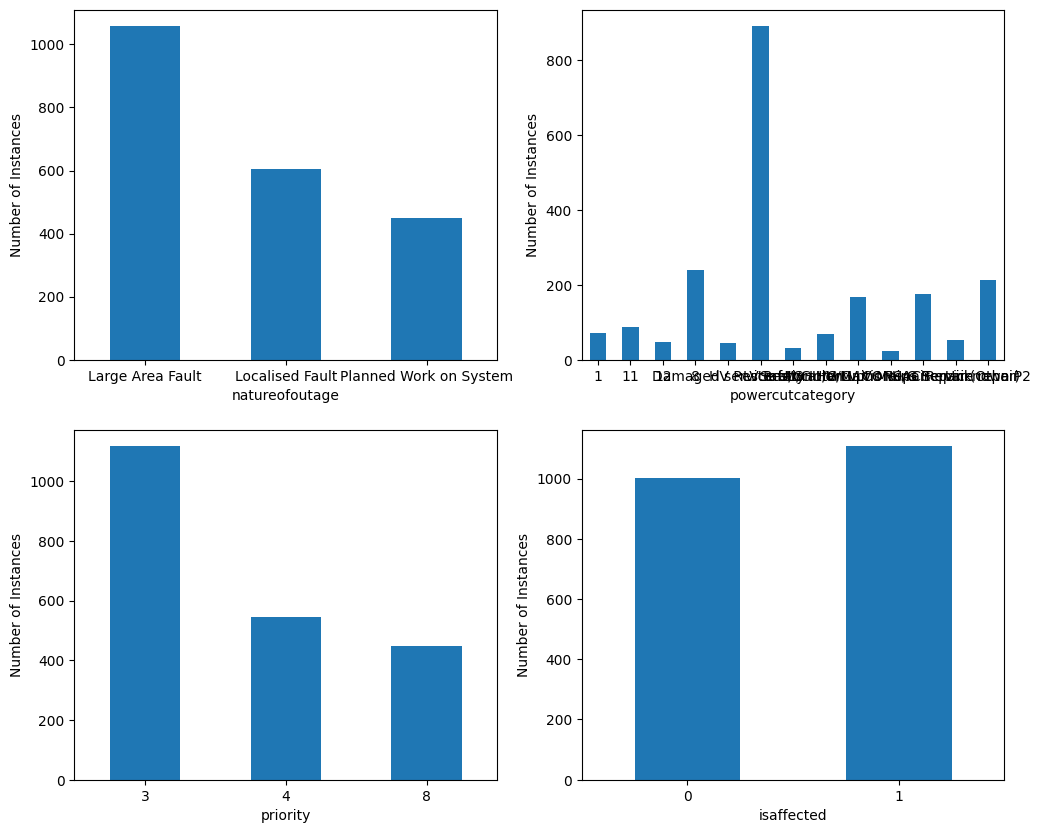

<Figure size 640x480 with 0 Axes>

In [67]:
import matplotlib.pyplot as plt

variables = ["natureofoutage", "powercutcategory", "priority", "isaffected"]

area = "North East"

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axs.view()

for i, var in enumerate(variables):
    row = i // 2
    col = i % 2
    cuts[cuts["area"] == 'North East'].groupby(var).count()["hours"].plot(kind='bar',  
                                                                               xlabel=var, 
                                                                               ylabel='Number of Instances',
                                                                               rot=0, ax=axs[row][col])
plt.show()

plt.tight_layout()
plt.show()


Total power cuts with Unique Incident IDs in the North East (frequency plot)

In [ ]:
import matplotlib.pyplot as plt

variables = ["natureofoutage", "powercutcategory", "priority", "isaffected"]

area = "North East"

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axs.view()

for i, var in enumerate(variables):
    row = i // 2
    col = i % 2
    cuts[cuts["area"] == 'North East'].groupby(var).count()["hours"].plot(kind='bar',  
                                                                               xlabel=var, 
                                                                               ylabel='Number of Instances',
                                                                               rot=0, ax=axs[row][col])
plt.show()

plt.tight_layout()
plt.show()


Total power cuts in the area, grouped by reason (Duration plot)

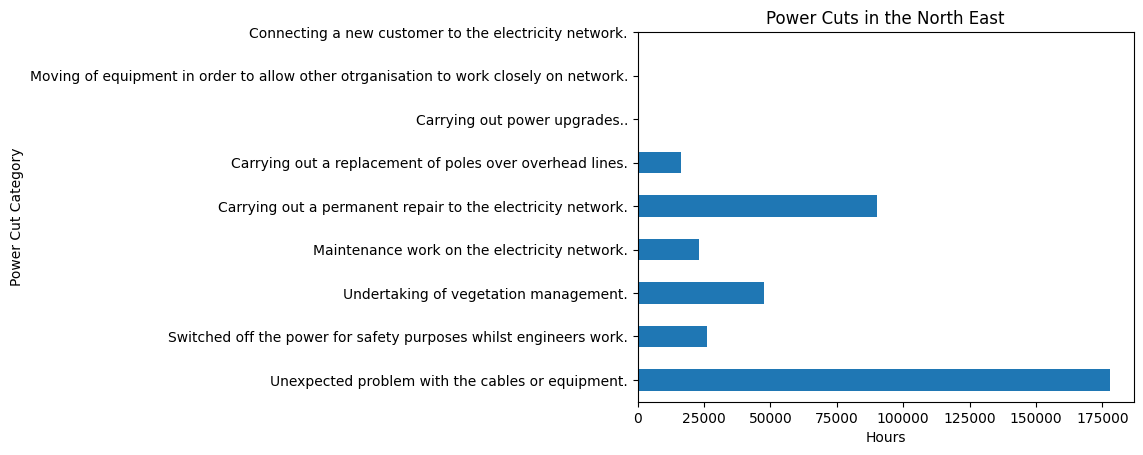

In [56]:
import matplotlib.pyplot as plt

power_label = [
"Unexpected problem with the cables or equipment.",
"Switched off the power for safety purposes whilst engineers work.",
"Undertaking of vegetation management.",
"Maintenance work on the electricity network.",
"Carrying out a permanent repair to the electricity network.",
"Carrying out a replacement of poles over overhead lines.",
"Carrying out power upgrades..",
"Moving of equipment in order to allow other otrganisation to work closely on network.",
"Connecting a new customer to the electricity network."]

import matplotlib.pyplot as plt

cuts_df = cuts[cuts["area"] == 'North East'].groupby('reason')['hours'].sum()
cuts_df.plot(kind='barh', title='Power Cuts in the North East', xlabel='Hours', ylabel='Power Cut Category', rot=0)

# set custom x-axis tick labels
plt.yticks(range(len(power_label)), power_label)

plt.show()


Unique power cuts in an area, grouped by reason (Duration plot)

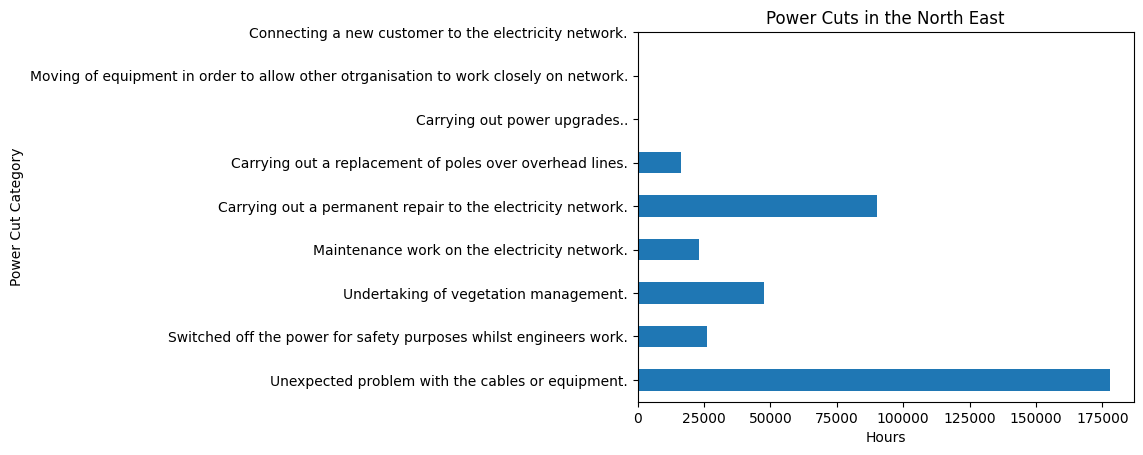

In [57]:
import matplotlib.pyplot as plt

power_label = [
"Unexpected problem with the cables or equipment.",
"Switched off the power for safety purposes whilst engineers work.",
"Undertaking of vegetation management.",
"Maintenance work on the electricity network.",
"Carrying out a permanent repair to the electricity network.",
"Carrying out a replacement of poles over overhead lines.",
"Carrying out power upgrades..",
"Moving of equipment in order to allow other otrganisation to work closely on network.",
"Connecting a new customer to the electricity network."]

import matplotlib.pyplot as plt

cuts_unique_df = cuts_unique[cuts_unique["area"] == 'North East'].groupby('reason')['hours'].sum()
cuts_unique_df.plot(kind='barh', title='Power cuts_unique in the North East', xlabel='Hours', ylabel='Power Cut Category', rot=0)

# set custom x-axis tick labels
plt.yticks(range(len(power_label)), power_label)

plt.show()

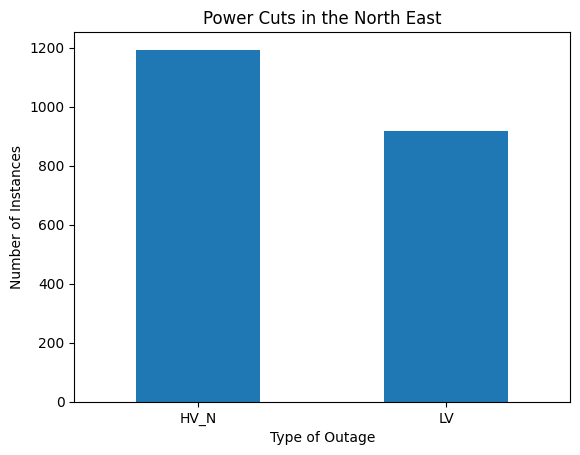

In [58]:
import matplotlib.pyplot as plt

cuts[cuts["area"] == 'North East'].groupby('type').count()["hours"].plot(kind='bar', 
                                                                               title='Power Cuts in the North East', 
                                                                               xlabel='Type of Outage', 
                                                                               ylabel='Number of Instances',
                                                                               rot=0)
plt.show()
